## Figure 11 (Journal of Climate submission; Molina et al.)

December-February (DJF) mean SSTs (◦C) and surface wind stress (N m−2) during El Niño (DJFONI≥+0.5) and La Niña (DJF ONI≤+0.5) shown for the CESM1 control (years 800-1599; a) across the Niño3.4 region. DJF mean SST anomalies during El Niño and La Niña are also shown for sensitivity experiments(b-f) as computed from the CESM1 control (a). Years 201-500 were used for Global and Pacific experiments(b-e) and years 101-250 were used for the Pacific Salt experiment (f).

**Figure by: Maria J. Molina, NCAR**

In [1]:
import xarray as xr
import numpy as np
from climatico import enso
from climatico.util import weighted_mean, pacific_lon
import matplotlib.pyplot as plt
import cftime
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches
import cartopy.feature as cfeature
from shapely.geometry.polygon import Polygon

In [2]:
from config import directory_figs, directory_data

In [3]:
ninodata = xr.open_dataset(f'{directory_data}fig10_ninodata.nc')
ninadata = xr.open_dataset(f'{directory_data}fig11_ninadata.nc')

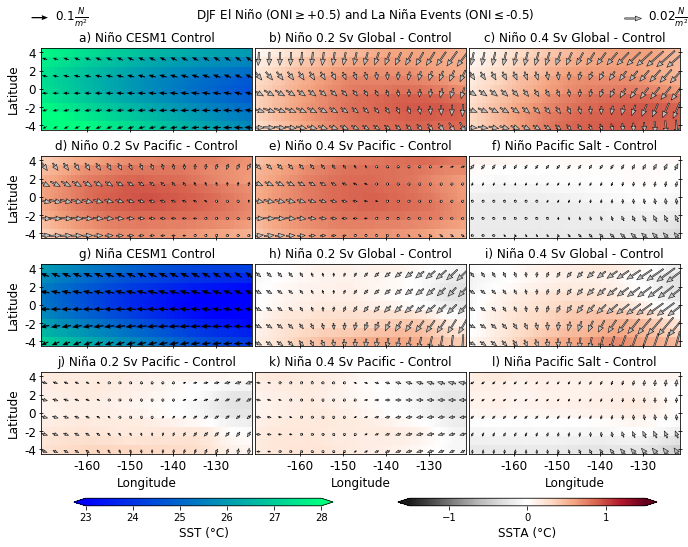

In [5]:
# -------------- create figure

a = u"\u00b0"
fig = plt.figure(figsize=(9,6))
fig.suptitle(u'DJF El Niño (ONI$\geq$+0.5) and La Niña Events (ONI$\leq$-0.5)', x=0.5, y=1.035, fontsize=12)

# --------------

ax1 = plt.axes([0., 0.75, 0.325, 0.19])

ax1.set_title('a) Niño CESM1 Control', fontsize=12)

cs1 = ax1.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['cntrl_diff_nino'].values, cmap='winter', vmin=23, vmax=28, shading='auto')

Q1 = ax1.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['cntrl_diff_ninotx'].values[::2, ::2], 
                ninodata['cntrl_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=0.79+0.5)

Q1._init()

qk = ax1.quiverkey(Q1, 0.01, 1.01, 0.1, r'$0.1 \frac{N}{m^2}$', labelpos='E', 
                   fontproperties={'size': '12'},
                   coordinates='figure')

ax1.set_yticks([-4,-2,0,2,4])
ax1.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax1.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax1.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax1.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax1.set_ylabel('Latitude', fontsize=12)

# --------------

ax2 = plt.axes([0.33, 0.75, 0.325, 0.19])

ax2.set_title('b) Niño 0.2 Sv Global - Control', fontsize=12)

ax2.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['g02sv_diff_nino'].values, cmap='RdGy_r', vmin=-1.5, vmax=1.5, shading='auto')

Q2 = ax2.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['g02sv_diff_ninotx'].values[::2, ::2], 
                ninodata['g02sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=0.25)

Q2._init()

ax2.quiverkey(Q2, 0.925, 1.01, 0.02, r'$0.02 \frac{N}{m^2}$', labelpos='E', 
              fontproperties={'size': '12'},
              coordinates='figure')

ax2.set_yticks([-4,-2,0,2,4])
ax2.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax2.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax2.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax2.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax3 = plt.axes([0.66, 0.75, 0.325, 0.19])

ax3.set_title('c) Niño 0.4 Sv Global - Control', fontsize=12)

ax3.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['g04sv_diff_nino'].values, cmap='RdGy_r', vmin=-1.5, vmax=1.5, shading='auto')

ax3.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['g04sv_diff_ninotx'].values[::2, ::2], 
                ninodata['g04sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax3.set_yticks([-4,-2,0,2,4])
ax3.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax3.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax3.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax3.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax4 = plt.axes([0., 0.5, 0.325, 0.19])

ax4.set_title('d) Niño 0.2 Sv Pacific - Control', fontsize=12)

ax4.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['p02sv_diff_nino'].values, cmap='RdGy_r', vmin=-1.5, vmax=1.5, shading='auto')

ax4.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['p02sv_diff_ninotx'].values[::2, ::2], 
                ninodata['p02sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax4.set_yticks([-4,-2,0,2,4])
ax4.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax4.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax4.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax4.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False,
                direction='inout', labelbottom=False, bottom=True)
ax4.set_ylabel('Latitude', fontsize=12)

# --------------

ax5 = plt.axes([0.33, 0.5, 0.325, 0.19])

ax5.set_title('e) Niño 0.4 Sv Pacific - Control', fontsize=12)

ax5.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['p04sv_diff_nino'].values, cmap='RdGy_r', vmin=-1.5, vmax=1.5, shading='auto')

ax5.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['p04sv_diff_ninotx'].values[::2, ::2], 
                ninodata['p04sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax5.set_yticks([-4,-2,0,2,4])
ax5.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax5.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax5.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax5.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax6 = plt.axes([0.66, 0.5, 0.325, 0.19])

ax6.set_title('f) Niño Pacific Salt - Control', fontsize=12)

cs2 = ax6.pcolormesh(
                ninodata.coords['lon'].values,
                ninodata.coords['lat'].values,
                ninodata['psalt_diff_nino'].values, cmap='RdGy_r', vmin=-1.5, vmax=1.5, shading='auto')

ax6.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['psalt_diff_ninotx'].values[::2, ::2], 
                ninodata['psalt_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax6.set_yticks([-4,-2,0,2,4])
ax6.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax6.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax6.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax6.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax7 = plt.axes([0., 0.25, 0.325, 0.19])

ax7.set_title('g) Niña CESM1 Control', fontsize=12)

ax7.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['cntrl_diff_nina'].values, cmap='winter', vmin=23, vmax=28, shading='auto')

ax7.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['cntrl_diff_ninatx'].values[::2, ::2], 
                ninadata['cntrl_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax7.set_yticks([-4,-2,0,2,4])
ax7.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax7.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax7.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax7.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax7.set_ylabel('Latitude', fontsize=12)

# --------------

ax8 = plt.axes([0.33, 0.25, 0.325, 0.19])

ax8.set_title('h) Niña 0.2 Sv Global - Control', fontsize=12)

ax8.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['g02sv_diff_nina'].values, cmap='RdGy_r', vmin=-1.5, vmax=1.5, shading='auto')

ax8.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['g02sv_diff_ninatx'].values[::2, ::2], 
                ninadata['g02sv_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax8.set_yticks([-4,-2,0,2,4])
ax8.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax8.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax8.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax8.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax9 = plt.axes([0.66, 0.25, 0.325, 0.19])

ax9.set_title('i) Niña 0.4 Sv Global - Control', fontsize=12)

ax9.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['g04sv_diff_nina'].values, cmap='RdGy_r', vmin=-1.5, vmax=1.5, shading='auto')

ax9.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['g04sv_diff_ninatx'].values[::2, ::2], 
                ninadata['g04sv_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax9.set_yticks([-4,-2,0,2,4])
ax9.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax9.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax9.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax9.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax10 = plt.axes([0., 0., 0.325, 0.19])

ax10.set_title('j) Niña 0.2 Sv Pacific - Control', fontsize=12)

ax10.pcolormesh(ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['p02sv_diff_nina'].values, cmap='RdGy_r', vmin=-1.5, vmax=1.5, shading='auto')

ax10.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
            ninadata['p02sv_diff_ninatx'].values[::2, ::2], 
            ninadata['p02sv_diff_ninaty'].values[::2, ::2], 
            headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax10.set_yticks([-4,-2,0,2,4])
ax10.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax10.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax10.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax10.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax10.set_xlabel(u'Longitude', fontsize=12)
ax10.set_ylabel('Latitude', fontsize=12)

# --------------

ax11 = plt.axes([0.33, 0., 0.325, 0.19])

ax11.set_title('k) Niña 0.4 Sv Pacific - Control', fontsize=12)

ax11.pcolormesh(ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['p04sv_diff_nina'].values, cmap='RdGy_r', vmin=-1.5, vmax=1.5, shading='auto')

ax11.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
            ninadata['p04sv_diff_ninatx'].values[::2, ::2], 
            ninadata['p04sv_diff_ninaty'].values[::2, ::2], 
            headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax11.set_yticks([-4,-2,0,2,4])
ax11.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax11.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax11.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax11.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax11.set_xlabel('Longitude', fontsize=12)

# --------------

ax12 = plt.axes([0.66, 0., 0.325, 0.19])

ax12.set_title('l) Niña Pacific Salt - Control', fontsize=12)

ax12.pcolormesh(ninadata.coords['lon'].values,
                ninadata.coords['lat'].values,
                ninadata['psalt_diff_nina'].values, cmap='RdGy_r', vmin=-1.5, vmax=1.5, shading='auto')

ax12.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
            ninadata['psalt_diff_ninatx'].values[::2, ::2], 
            ninadata['psalt_diff_ninaty'].values[::2, ::2], 
            headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax12.set_yticks([-4,-2,0,2,4])
ax12.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax12.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax12.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax12.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax12.set_xlabel('Longitude', fontsize=12)

# --------------

a = u"\u00b0"

cbar_ax = fig.add_axes([0.05, -0.12, 0.4, 0.0175])
ticks_1 = [23,24,25,26,27,28]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('SST ('+a+'C)', fontsize=12)

cbar_ax = fig.add_axes([0.55, -0.12, 0.4, 0.0175])
ticks_1 = [-2,-1,0,1,2]
cbar = fig.colorbar(cs2, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('SSTA ('+a+'C)', fontsize=12)

# --------------

plt.savefig(f'{directory_figs}amocenso_fig11.png', bbox_inches='tight', dpi=200)
plt.show()

# --------------

## Previous figure versions below

In [6]:
"""
nino = enso.DefineNino(nino='nino34', lats='lat', lons='lon', cutoff=0.5, runningmean=3)

file_cntrl = 'b1d.e11.B1850C5CN.f09_g16.005.pop.h.SST.*.nc'
ds2 = xr.open_mfdataset(f'{directory_data}{file_cntrl}',
                        combine='by_coords',
                        preprocess=nino.nino)
ds2 = ds2.isel(z_t=0).sel(time=slice(cftime.DatetimeNoLeap(799, 1, 1, 0, 0),cftime.DatetimeNoLeap(1601, 12, 1, 0, 0))).resample(time='QS-DEC').mean(skipna=True)['SST']
ds2 = ds2[ds2['time'].dt.month==12]
ds2 = ds2[(ds2['time'].dt.year>=801)&(ds2['time'].dt.year<=1599)]
control_sstclimo = ds2.mean(dim=['time'], skipna=True)

taux_cntrl = 'b.e11.B1850C5CN.f09_g16.005.cam.h0.TAUX.*.nc'
ds2 = xr.open_mfdataset(f'{directory_data}{taux_cntrl}',
                        combine='by_coords',
                        preprocess=nino.nino)
ds2 = ds2.sel(time=slice(cftime.DatetimeNoLeap(799, 1, 1, 0, 0),cftime.DatetimeNoLeap(1601, 12, 1, 0, 0))).resample(time='QS-DEC').mean(skipna=True)['TAUX']
ds2 = ds2[ds2['time'].dt.month==12]
ds2 = ds2[(ds2['time'].dt.year>=801)&(ds2['time'].dt.year<=1599)]
control_tauxclimo = ds2.mean(dim=['time'], skipna=True)

tauy_cntrl = 'b.e11.B1850C5CN.f09_g16.005.cam.h0.TAUY.*.nc'
ds2 = xr.open_mfdataset(f'{directory_data}{tauy_cntrl}',
                        combine='by_coords',
                        preprocess=nino.nino)
ds2 = ds2.sel(time=slice(cftime.DatetimeNoLeap(799, 1, 1, 0, 0),cftime.DatetimeNoLeap(1601, 12, 1, 0, 0))).resample(time='QS-DEC').mean(skipna=True)['TAUY']
ds2 = ds2[ds2['time'].dt.month==12]
ds2 = ds2[(ds2['time'].dt.year>=801)&(ds2['time'].dt.year<=1599)]
control_tauyclimo = ds2.mean(dim=['time'], skipna=True)
"""

"\nnino = enso.DefineNino(nino='nino34', lats='lat', lons='lon', cutoff=0.5, runningmean=3)\n\nfile_cntrl = 'b1d.e11.B1850C5CN.f09_g16.005.pop.h.SST.*.nc'\nds2 = xr.open_mfdataset(f'{directory_data}{file_cntrl}',\n                        combine='by_coords',\n                        preprocess=nino.nino)\nds2 = ds2.isel(z_t=0).sel(time=slice(cftime.DatetimeNoLeap(799, 1, 1, 0, 0),cftime.DatetimeNoLeap(1601, 12, 1, 0, 0))).resample(time='QS-DEC').mean(skipna=True)['SST']\nds2 = ds2[ds2['time'].dt.month==12]\nds2 = ds2[(ds2['time'].dt.year>=801)&(ds2['time'].dt.year<=1599)]\ncontrol_sstclimo = ds2.mean(dim=['time'], skipna=True)\n\ntaux_cntrl = 'b.e11.B1850C5CN.f09_g16.005.cam.h0.TAUX.*.nc'\nds2 = xr.open_mfdataset(f'{directory_data}{taux_cntrl}',\n                        combine='by_coords',\n                        preprocess=nino.nino)\nds2 = ds2.sel(time=slice(cftime.DatetimeNoLeap(799, 1, 1, 0, 0),cftime.DatetimeNoLeap(1601, 12, 1, 0, 0))).resample(time='QS-DEC').mean(skipna=True)['

In [7]:
"""
# --------------

a = u"\u00b0"
fig = plt.figure(figsize=(9,6))
fig.suptitle(u'DJF El Niño (ONI$\geq$+0.5) and La Niña Events (ONI$\leq$-0.5)', x=0.5, y=1.035, fontsize=12)

# --------------

ax1 = plt.axes([0., 0.75, 0.325, 0.19])

ax1.set_title('a) Niño CESM1 Control', fontsize=12)

cs1 = ax1.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['cntrl_diff_nino'].values-control_sstclimo.values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

Q1 = ax1.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['cntrl_diff_ninotx'].values[::2, ::2]-control_tauxclimo.values[::2, ::2], 
                ninodata['cntrl_diff_ninoty'].values[::2, ::2]-control_tauyclimo.values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=None)

Q1._init()

qk = ax1.quiverkey(Q1, 0.01, 1.01, 0.1, r'$0.1 \frac{N}{m^2}$', labelpos='E', 
                   fontproperties={'size': '12'},
                   coordinates='figure')

ax1.set_yticks([-4,-2,0,2,4])
ax1.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax1.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax1.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax1.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax1.set_ylabel('Latitude', fontsize=12)

# --------------

ax2 = plt.axes([0.33, 0.75, 0.325, 0.19])

ax2.set_title('b) Niño 0.2 Sv Global - Control', fontsize=12)

ax2.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['g02sv_diff_nino'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

Q2 = ax2.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['g02sv_diff_ninotx'].values[::2, ::2], 
                ninodata['g02sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=0.25)

Q2._init()

ax2.quiverkey(Q2, 0.925, 1.01, 0.02, r'$0.02 \frac{N}{m^2}$', labelpos='E', 
              fontproperties={'size': '12'},
              coordinates='figure')

ax2.set_yticks([-4,-2,0,2,4])
ax2.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax2.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax2.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax2.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax3 = plt.axes([0.66, 0.75, 0.325, 0.19])

ax3.set_title('c) Niño 0.4 Sv Global - Control', fontsize=12)

ax3.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['g04sv_diff_nino'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax3.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['g04sv_diff_ninotx'].values[::2, ::2], 
                ninodata['g04sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax3.set_yticks([-4,-2,0,2,4])
ax3.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax3.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax3.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax3.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax4 = plt.axes([0., 0.5, 0.325, 0.19])

ax4.set_title('d) Niño 0.2 Sv Pacific - Control', fontsize=12)

ax4.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['p02sv_diff_nino'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax4.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['p02sv_diff_ninotx'].values[::2, ::2], 
                ninodata['p02sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax4.set_yticks([-4,-2,0,2,4])
ax4.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax4.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax4.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax4.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False,
                direction='inout', labelbottom=False, bottom=True)
ax4.set_ylabel('Latitude', fontsize=12)

# --------------

ax5 = plt.axes([0.33, 0.5, 0.325, 0.19])

ax5.set_title('e) Niño 0.4 Sv Pacific - Control', fontsize=12)

ax5.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['p04sv_diff_nino'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax5.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['p04sv_diff_ninotx'].values[::2, ::2], 
                ninodata['p04sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax5.set_yticks([-4,-2,0,2,4])
ax5.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax5.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax5.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax5.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax6 = plt.axes([0.66, 0.5, 0.325, 0.19])

ax6.set_title('f) Niño Pacific Salt - Control', fontsize=12)

cs2 = ax6.pcolormesh(
                ninodata.coords['lon'].values,
                ninodata.coords['lat'].values,
                ninodata['psalt_diff_nino'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax6.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['psalt_diff_ninotx'].values[::2, ::2], 
                ninodata['psalt_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax6.set_yticks([-4,-2,0,2,4])
ax6.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax6.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax6.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax6.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax7 = plt.axes([0., 0.25, 0.325, 0.19])

ax7.set_title('g) Niña CESM1 Control', fontsize=12)

ax7.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['cntrl_diff_nina'].values-control_sstclimo.values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax7.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['cntrl_diff_ninatx'].values[::2, ::2]-control_tauxclimo.values[::2, ::2],  
                ninadata['cntrl_diff_ninaty'].values[::2, ::2]-control_tauyclimo.values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax7.set_yticks([-4,-2,0,2,4])
ax7.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax7.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax7.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax7.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax7.set_ylabel('Latitude', fontsize=12)

# --------------

ax8 = plt.axes([0.33, 0.25, 0.325, 0.19])

ax8.set_title('h) Niña 0.2 Sv Global - Control', fontsize=12)

ax8.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['g02sv_diff_nina'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax8.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['g02sv_diff_ninatx'].values[::2, ::2], 
                ninadata['g02sv_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax8.set_yticks([-4,-2,0,2,4])
ax8.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax8.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax8.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax8.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax9 = plt.axes([0.66, 0.25, 0.325, 0.19])

ax9.set_title('i) Niña 0.4 Sv Global - Control', fontsize=12)

ax9.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['g04sv_diff_nina'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax9.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['g04sv_diff_ninatx'].values[::2, ::2], 
                ninadata['g04sv_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax9.set_yticks([-4,-2,0,2,4])
ax9.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax9.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax9.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax9.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax10 = plt.axes([0., 0., 0.325, 0.19])

ax10.set_title('j) Niña 0.2 Sv Pacific - Control', fontsize=12)

ax10.pcolormesh(ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['p02sv_diff_nina'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax10.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
            ninadata['p02sv_diff_ninatx'].values[::2, ::2], 
            ninadata['p02sv_diff_ninaty'].values[::2, ::2], 
            headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax10.set_yticks([-4,-2,0,2,4])
ax10.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax10.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax10.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax10.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax10.set_xlabel(u'Longitude', fontsize=12)
ax10.set_ylabel('Latitude', fontsize=12)

# --------------

ax11 = plt.axes([0.33, 0., 0.325, 0.19])

ax11.set_title('k) Niña 0.4 Sv Pacific - Control', fontsize=12)

ax11.pcolormesh(ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['p04sv_diff_nina'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax11.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
            ninadata['p04sv_diff_ninatx'].values[::2, ::2], 
            ninadata['p04sv_diff_ninaty'].values[::2, ::2], 
            headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax11.set_yticks([-4,-2,0,2,4])
ax11.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax11.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax11.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax11.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax11.set_xlabel('Longitude', fontsize=12)

# --------------

ax12 = plt.axes([0.66, 0., 0.325, 0.19])

ax12.set_title('l) Niña Pacific Salt - Control', fontsize=12)

ax12.pcolormesh(ninadata.coords['lon'].values,
                ninadata.coords['lat'].values,
                ninadata['psalt_diff_nina'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax12.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
            ninadata['psalt_diff_ninatx'].values[::2, ::2], 
            ninadata['psalt_diff_ninaty'].values[::2, ::2], 
            headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax12.set_yticks([-4,-2,0,2,4])
ax12.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax12.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax12.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax12.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax12.set_xlabel('Longitude', fontsize=12)

# --------------

a = u"\u00b0"

cbar_ax = fig.add_axes([0.05, -0.12, 0.4, 0.0175])
ticks_1 = [23,24,25,26,27,28]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('SST ('+a+'C)', fontsize=12)

cbar_ax = fig.add_axes([0.55, -0.12, 0.4, 0.0175])
ticks_1 = [-2,-1,0,1,2]
cbar = fig.colorbar(cs2, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('SSTA ('+a+'C)', fontsize=12)

# --------------

plt.show()

# --------------
"""

'\n# --------------\n\na = u"°"\nfig = plt.figure(figsize=(9,6))\nfig.suptitle(u\'DJF El Niño (ONI$\\geq$+0.5) and La Niña Events (ONI$\\leq$-0.5)\', x=0.5, y=1.035, fontsize=12)\n\n# --------------\n\nax1 = plt.axes([0., 0.75, 0.325, 0.19])\n\nax1.set_title(\'a) Niño CESM1 Control\', fontsize=12)\n\ncs1 = ax1.pcolormesh(\n                ninodata.coords[\'lon\'].values, ninodata.coords[\'lat\'].values,\n                ninodata[\'cntrl_diff_nino\'].values-control_sstclimo.values, cmap=\'seismic\', vmin=-2, vmax=2, shading=\'auto\')\n\nQ1 = ax1.quiver(ninodata.coords[\'lons\'].values[::2], ninodata.coords[\'lats\'].values[::2],\n                ninodata[\'cntrl_diff_ninotx\'].values[::2, ::2]-control_tauxclimo.values[::2, ::2], \n                ninodata[\'cntrl_diff_ninoty\'].values[::2, ::2]-control_tauyclimo.values[::2, ::2], \n                headwidth=4, minshaft=1.5, minlength=2, pivot=\'mid\', color=\'k\', scale=None)\n\nQ1._init()\n\nqk = ax1.quiverkey(Q1, 0.01, 1.01, 0.1, r\'$

In [8]:
"""
# --------------

a = u"\u00b0"
fig = plt.figure(figsize=(9,6))
fig.suptitle(u'DJF El Niño (ONI$\geq$+0.5) and La Niña Events (ONI$\leq$-0.5)', x=0.5, y=1.035, fontsize=12)

# --------------

ax1 = plt.axes([0., 0.75, 0.325, 0.19])

ax1.set_title('a) Niño CESM1 Control', fontsize=12)

cs1 = ax1.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['cntrl_diff_nino'].values, cmap='winter_r', vmin=23, vmax=28, shading='auto')

Q1 = ax1.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                np.zeros((ninodata['cntrl_diff_ninotx'].values[::2, ::2].shape)), 
                ninodata['cntrl_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=None)

Q1._init()

qk = ax1.quiverkey(Q1, 0.01, 1.01, 0.1, r'$0.1 \frac{N}{m^2}$', labelpos='E', 
                   fontproperties={'size': '12'},
                   coordinates='figure')

ax1.set_yticks([-4,-2,0,2,4])
ax1.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax1.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax1.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax1.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax1.set_ylabel('Latitude', fontsize=12)

# --------------

ax2 = plt.axes([0.33, 0.75, 0.325, 0.19])

ax2.set_title('b) Niño 0.2 Sv Global - Control', fontsize=12)

ax2.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['g02sv_diff_nino'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

Q2 = ax2.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                np.zeros((ninodata['g02sv_diff_ninotx'].values[::2, ::2].shape)), 
                ninodata['g02sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=0.25)

Q2._init()

ax2.quiverkey(Q2, 0.925, 1.01, 0.02, r'$0.02 \frac{N}{m^2}$', labelpos='E', 
              fontproperties={'size': '12'},
              coordinates='figure')

ax2.set_yticks([-4,-2,0,2,4])
ax2.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax2.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax2.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax2.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax3 = plt.axes([0.66, 0.75, 0.325, 0.19])

ax3.set_title('c) Niño 0.4 Sv Global - Control', fontsize=12)

ax3.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['g04sv_diff_nino'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax3.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                np.zeros((ninodata['g04sv_diff_ninotx'].values[::2, ::2].shape)), 
                ninodata['g04sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax3.set_yticks([-4,-2,0,2,4])
ax3.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax3.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax3.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax3.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax4 = plt.axes([0., 0.5, 0.325, 0.19])

ax4.set_title('d) Niño 0.2 Sv Pacific - Control', fontsize=12)

ax4.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['p02sv_diff_nino'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax4.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                np.zeros((ninodata['p02sv_diff_ninotx'].values[::2, ::2].shape)), 
                ninodata['p02sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax4.set_yticks([-4,-2,0,2,4])
ax4.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax4.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax4.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax4.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False,
                direction='inout', labelbottom=False, bottom=True)
ax4.set_ylabel('Latitude', fontsize=12)

# --------------

ax5 = plt.axes([0.33, 0.5, 0.325, 0.19])

ax5.set_title('e) Niño 0.4 Sv Pacific - Control', fontsize=12)

ax5.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['p04sv_diff_nino'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax5.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                np.zeros((ninodata['p04sv_diff_ninotx'].values[::2, ::2].shape)), 
                ninodata['p04sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax5.set_yticks([-4,-2,0,2,4])
ax5.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax5.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax5.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax5.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax6 = plt.axes([0.66, 0.5, 0.325, 0.19])

ax6.set_title('f) Niño Pacific Salt - Control', fontsize=12)

cs2 = ax6.pcolormesh(
                ninodata.coords['lon'].values,
                ninodata.coords['lat'].values,
                ninodata['psalt_diff_nino'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax6.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                np.zeros((ninodata['psalt_diff_ninotx'].values[::2, ::2].shape)), 
                ninodata['psalt_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax6.set_yticks([-4,-2,0,2,4])
ax6.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax6.set_xticks(ninodata.coords['lon'].values[10::10]+0.5)
ax6.set_xticklabels((ninodata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax6.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax7 = plt.axes([0., 0.25, 0.325, 0.19])

ax7.set_title('g) Niña CESM1 Control', fontsize=12)

ax7.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['cntrl_diff_nina'].values, cmap='winter_r', vmin=23, vmax=28, shading='auto')

ax7.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                np.zeros((ninadata['cntrl_diff_ninatx'].values[::2, ::2].shape)), 
                ninadata['cntrl_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=Q1.scale)

ax7.set_yticks([-4,-2,0,2,4])
ax7.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax7.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax7.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax7.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax7.set_ylabel('Latitude', fontsize=12)

# --------------

ax8 = plt.axes([0.33, 0.25, 0.325, 0.19])

ax8.set_title('h) Niña 0.2 Sv Global - Control', fontsize=12)

ax8.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['g02sv_diff_nina'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax8.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                np.zeros((ninadata['g02sv_diff_ninatx'].values[::2, ::2].shape)), 
                ninadata['g02sv_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax8.set_yticks([-4,-2,0,2,4])
ax8.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax8.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax8.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax8.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax9 = plt.axes([0.66, 0.25, 0.325, 0.19])

ax9.set_title('i) Niña 0.4 Sv Global - Control', fontsize=12)

ax9.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['g04sv_diff_nina'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax9.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                np.zeros((ninadata['g04sv_diff_ninatx'].values[::2, ::2].shape)), 
                ninadata['g04sv_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax9.set_yticks([-4,-2,0,2,4])
ax9.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax9.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax9.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax9.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax10 = plt.axes([0., 0., 0.325, 0.19])

ax10.set_title('j) Niña 0.2 Sv Pacific - Control', fontsize=12)

ax10.pcolormesh(ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['p02sv_diff_nina'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax10.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
            np.zeros((ninadata['p02sv_diff_ninatx'].values[::2, ::2].shape)), 
            ninadata['p02sv_diff_ninaty'].values[::2, ::2], 
            headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax10.set_yticks([-4,-2,0,2,4])
ax10.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax10.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax10.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax10.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax10.set_xlabel(u'Longitude', fontsize=12)
ax10.set_ylabel('Latitude', fontsize=12)

# --------------

ax11 = plt.axes([0.33, 0., 0.325, 0.19])

ax11.set_title('k) Niña 0.4 Sv Pacific - Control', fontsize=12)

ax11.pcolormesh(ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['p04sv_diff_nina'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax11.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
            np.zeros((ninadata['p04sv_diff_ninatx'].values[::2, ::2].shape)), 
            ninadata['p04sv_diff_ninaty'].values[::2, ::2], 
            headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax11.set_yticks([-4,-2,0,2,4])
ax11.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax11.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax11.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax11.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax11.set_xlabel('Longitude', fontsize=12)

# --------------

ax12 = plt.axes([0.66, 0., 0.325, 0.19])

ax12.set_title('l) Niña Pacific Salt - Control', fontsize=12)

ax12.pcolormesh(ninadata.coords['lon'].values,
                ninadata.coords['lat'].values,
                ninadata['psalt_diff_nina'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax12.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
            np.zeros((ninadata['psalt_diff_ninatx'].values[::2, ::2].shape)), 
            ninadata['psalt_diff_ninaty'].values[::2, ::2], 
            headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax12.set_yticks([-4,-2,0,2,4])
ax12.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax12.set_xticks(ninadata.coords['lon'].values[10::10]+0.5)
ax12.set_xticklabels((ninadata.coords['lon'].values[10::10]-360.5).astype('int'), fontsize=12)
ax12.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax12.set_xlabel('Longitude', fontsize=12)

# --------------

a = u"\u00b0"

cbar_ax = fig.add_axes([0.05, -0.12, 0.4, 0.0175])
ticks_1 = [23,24,25,26,27,28]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('SST ('+a+'C)', fontsize=12)

cbar_ax = fig.add_axes([0.55, -0.12, 0.4, 0.0175])
ticks_1 = [-2,-1,0,1,2]
cbar = fig.colorbar(cs2, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('SSTA ('+a+'C)', fontsize=12)

# --------------

#plt.savefig(f'{directory_figs}amocenso_onimerid.png', bbox_inches='tight', dpi=200)
plt.show()

# --------------
"""

'\n# --------------\n\na = u"°"\nfig = plt.figure(figsize=(9,6))\nfig.suptitle(u\'DJF El Niño (ONI$\\geq$+0.5) and La Niña Events (ONI$\\leq$-0.5)\', x=0.5, y=1.035, fontsize=12)\n\n# --------------\n\nax1 = plt.axes([0., 0.75, 0.325, 0.19])\n\nax1.set_title(\'a) Niño CESM1 Control\', fontsize=12)\n\ncs1 = ax1.pcolormesh(\n                ninodata.coords[\'lon\'].values, ninodata.coords[\'lat\'].values,\n                ninodata[\'cntrl_diff_nino\'].values, cmap=\'winter_r\', vmin=23, vmax=28, shading=\'auto\')\n\nQ1 = ax1.quiver(ninodata.coords[\'lons\'].values[::2], ninodata.coords[\'lats\'].values[::2],\n                np.zeros((ninodata[\'cntrl_diff_ninotx\'].values[::2, ::2].shape)), \n                ninodata[\'cntrl_diff_ninoty\'].values[::2, ::2], \n                headwidth=4, minshaft=1.5, minlength=2, pivot=\'mid\', color=\'k\', scale=None)\n\nQ1._init()\n\nqk = ax1.quiverkey(Q1, 0.01, 1.01, 0.1, r\'$0.1 \x0crac{N}{m^2}$\', labelpos=\'E\', \n                   fontpropertie